In [11]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla
import scipy

def H(size,t1,t2,d,D,PBC=False,broken_cell = False):


	U = np.array([[0,t1+d+1j*D],[t1-d+1j*D,0]])
	Tm = np.array([[0,0],[t2,0]])

	diagonal = np.eye(size)
	off_diagonal_p = np.eye(size, k = 1)
	off_diagonal_m = np.eye(size, k = -1)

	hamiltonian = np.kron(diagonal, U)+ np.kron(off_diagonal_m, Tm.conj().T) + np.kron(off_diagonal_p,Tm) 


	if PBC==True:
		if broken_cell == True:
			print('broken_cell == True requires open system here')
			exit()
		boundary_p = np.eye(size, k = size-1)
		boundary_m = np.eye(size, k = -(size-1))

		boundary_terms = np.kron(boundary_p,Tm.conj().T)+ np.kron(boundary_m,Tm)

		hamiltonian = hamiltonian + boundary_terms

	elif broken_cell == True:
		hop_vec = np.zeros(2*size)
		hop_vec[-1] = np.conj(t2)
		hamiltonian = np.append(hamiltonian,[hop_vec],axis=0)

		hop_vec_T = np.zeros(2*size+1)
		hop_vec_T[-2]= t2
		hamiltonian = np.append(hamiltonian,np.array([hop_vec_T]).T,axis=1)

	return hamiltonian

[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.      

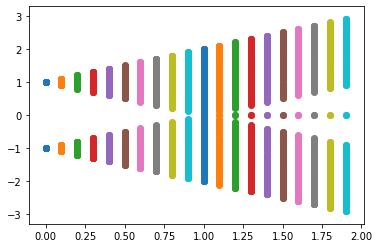

In [12]:
#plot spectrum of the chain
for k in np.arange(0,2,0.1):
	h = H(50,1,k,0,0,broken_cell=False)

	eigs, eigvec = np.linalg.eigh(h)
	if k==0:
		print(eigvec[:,50])

	plt.scatter(np.ones(eigs.shape)*k,eigs)
plt.show()

In [13]:
# get left and right eigenvectors in the non-Hermitian case

t1=1.0
t2=1.5
d=0.3
D=0.1
size=200

hamiltonian = H(size,t1,t2,d,D,PBC=True)

eigvals, eigvecL, eigvecR = eig(hamiltonian,left=True,right=True)

norm = np.diag(eigvecL.conj().T @ eigvecR ) 
eigvecR = eigvecR/norm


In [14]:
#position operator 
x = np.arange(0,size,1)
position_op = np.array(np.kron( np.diag(x) , np.eye(2)), dtype=complex)

# for broken cell
add_vec = np.zeros((len(position_op)+1,1))
add_vec[-1] = (size) 
position_op = np.append(np.append(position_op,np.zeros((1,len(position_op))), axis=0), add_vec,axis=1)
print(position_op.shape)
print(position_op)

(401, 401)
[[  0.+0.j   0.+0.j   0.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j   0.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j   1.+0.j ...   0.+0.j   0.+0.j   0.+0.j]
 ...
 [  0.+0.j   0.+0.j   0.+0.j ... 199.+0.j   0.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j   0.+0.j ...   0.+0.j 199.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j   0.+0.j ...   0.+0.j   0.+0.j 200.+0.j]]


(-0.2, 1.2)

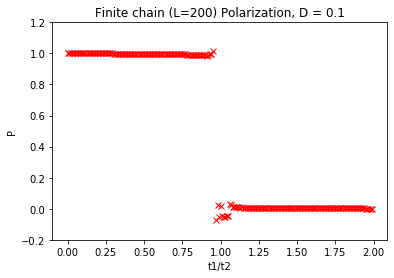

In [15]:
#polarization as function of t1
t_range = np.arange(0,2,0.01)
exp_pos = np.zeros(len(t_range), dtype=complex)





for tind,t in enumerate(t_range):
    hamiltonian = scipy.sparse.csr_matrix(H(size,t1,t,d,D,PBC=False,broken_cell=True), dtype=complex)
    v0 = np.zeros((2*size + 1,), dtype=complex)
    v0[2*size] = 1

    eigvals, eigvecR = sla.eigs(hamiltonian, k=1, sigma=1e-3, v0=v0)
#     print(eigvals, eigvecR)
    eigvals, eigvecL = sla.eigs(hamiltonian.T.conj(), k=1, sigma=1e-3, v0=v0)
#     print(eigvals, eigvecL)
    #note: eigvals are sorted in a strange way. uncomment the next line to so whats going on
    #print(eigvals)

    norm = np.diag(eigvecL.conj().T @ eigvecR )
#     print('norm = ', norm)
    eigvecR = eigvecR/norm
    

    ind = 0
#     print(ind)
#     print(eigvals, eigvecL.shape, eigvecR.shape)
    exp_pos[tind] = eigvecL[:,ind].conj() @ position_op @ eigvecR[:,ind]

plt.plot(t_range, exp_pos/size,'x', c = 'r')
plt.title('Finite chain (L=200) Polarization, D = '+str(D))
plt.ylabel('P')
plt.xlabel('t1/t2')
plt.ylim([-0.2,1.2])
